In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

sns.set_style("darkgrid")

In [4]:
train_df = pd.read_csv("dataset/train.csv", parse_dates=["date"])
original_train_df = train_df.copy()
test_df = pd.read_csv("dataset/test.csv", parse_dates=["date"])

In [5]:
display(train_df.head(3))
display(test_df.head(3))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers


In [6]:
def get_val_counts(df, column_name, sort_by_column_name=False):
  value_count = df[column_name].value_counts().reset_index().rename(columns={"count":"Value Count"}).set_index(column_name)
  value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
  value_count = value_count.reset_index()
  if sort_by_column_name:
    value_count = value_count.sort_values(column_name)
  return value_count

def plot_value_counts_pie(df, column_name, sort_by_column_name=False):
  val_count_df = get_val_counts(df, column_name, sort_by_column_name)
  val_count_df.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel="");

def plot_value_counts_bar(df, column_name, sort_by_column_name=False):
  val_count_df = get_val_counts(df, column_name, sort_by_column_name)
  f, ax = plt.subplots(figsize=(12, 6))
  sns.barplot(data=val_count_df, y="Value Count", x=column_name)
  
  for index, row in val_count_df.iterrows():
    count = row["Value Count"]
    percentage = row["Percentage"]
    ax.text(
      x=index,
      y=row["Value Count"] + max(val_count_df["Value Count"])*0.02,
      s=f"{count}({percentage:.2f}%)",
      ha="center",
      va="bottom"
    )
  
  

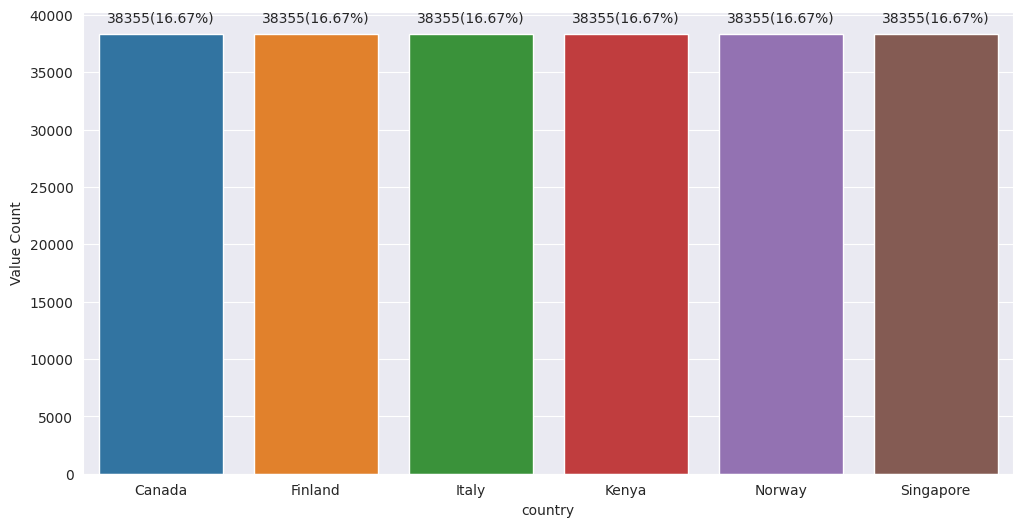

In [7]:
plot_value_counts_bar(train_df, "country")